<a href="https://colab.research.google.com/github/OSegun/Zummit-Africa-ML-AL-Projects/blob/main/Dog_%26_Cat_Image_Classifier_With_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dog & Cat Classification With CNN And SVM model Used Case


The Dataset can be downloaded from kaggle website https://www.kaggle.com/c/dogs-vs-cats/data

In [47]:
# Importing all necessary libaries

import os
from zipfile import ZipFile
import zipfile
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2
tf.__version__

'2.11.0'

In [48]:
!wget --no-check-certificate \ # Downloading the cat & dog dataset
   https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip -O \
   /tmp/cats_and_dogs_filtered.zip

--2023-03-20 14:10:22--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.219.128, 209.85.146.128, 209.85.147.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.219.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   190MB/s    in 0.3s    

2023-03-20 14:10:23 (190 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [49]:
# Creating directories for our training and test dataset
local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()
  
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'validation')


In [50]:
print(train_dir)

/tmp/cats_and_dogs_filtered/train


In [51]:
# Data Preprocessing

# Preprocessing the training dataset

train_gen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2,
                               zoom_range = 0.2, horizontal_flip = True)

train_set = train_gen.flow_from_directory(train_dir, target_size = (64, 64),
                                          batch_size = 32, class_mode = 'binary')



Found 2000 images belonging to 2 classes.


In [52]:
# Preprocessing the training dataset

test_gen = ImageDataGenerator(rescale = 1./255)
test_set = test_gen.flow_from_directory(test_dir, target_size = (64, 64),
                                          batch_size = 32, class_mode = 'binary')

Found 1000 images belonging to 2 classes.


In [53]:
# Building the CNN


# Initialising the CNN
cnn = tf.keras.models.Sequential()

# Step 1 - Convolution
cnn.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3, activation='relu', strides=2, input_shape=[64, 64, 3]))

# Step 2 - Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding a second convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Step 3 - Flattening
cnn.add(tf.keras.layers.Flatten())

# Step 4 - Full Connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

# Step 5 - Output Layer
# regularizers and linear activation function as a used case for SVM binary model
## For Binary Classification
cnn.add(Dense(1, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation
             ='linear'))

In [54]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_3 (Dense)             (None, 128)              

In [55]:
# Training the CNN

# Compiling the CNN
cnn.compile(optimizer = 'adam', loss = 'hinge', metrics = ['accuracy'])

# Training the CNN on the Training set and evaluating it on the Test set
r = cnn.fit(x = train_set, validation_data = test_set, epochs = 15)

Epoch 1/15
63/63 [==============================] - 17s 249ms/step - loss: 1.0117 - accuracy: 0.5145 - val_loss: 0.9554 - val_accuracy: 0.5400
Epoch 2/15
63/63 [==============================] - 17s 268ms/step - loss: 0.9194 - accuracy: 0.5685 - val_loss: 0.7791 - val_accuracy: 0.6250
Epoch 3/15
63/63 [==============================] - 17s 269ms/step - loss: 0.7985 - accuracy: 0.6210 - val_loss: 0.7593 - val_accuracy: 0.6560
Epoch 4/15
63/63 [==============================] - 17s 268ms/step - loss: 0.7810 - accuracy: 0.6370 - val_loss: 0.7630 - val_accuracy: 0.6650
Epoch 5/15
63/63 [==============================] - 17s 268ms/step - loss: 0.7298 - accuracy: 0.6625 - val_loss: 0.7211 - val_accuracy: 0.7000
Epoch 6/15
63/63 [==============================] - 17s 266ms/step - loss: 0.6727 - accuracy: 0.6875 - val_loss: 0.6522 - val_accuracy: 0.7000
Epoch 7/15
63/63 [==============================] - 17s 269ms/step - loss: 0.6421 - accuracy: 0.6920 - val_loss: 0.6445 - val_accuracy: 0.7160

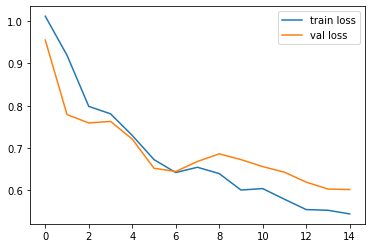

<Figure size 432x288 with 0 Axes>

In [58]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')



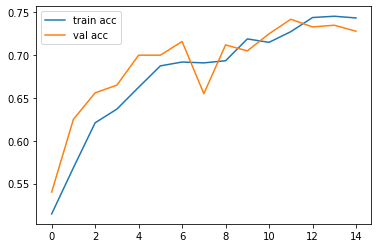

<Figure size 432x288 with 0 Axes>

In [59]:
# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')